In [88]:
from scipy import interpolate
import torch

In [89]:
# 450nm
# m = 0
m0_450_t = torch.tensor([ 20.5625 , 21.0625, 206.5   ])
m0_450_b = torch.tensor([ 21.125,  21.625, 225.125])

# m = 1
m1_450_t = torch.tensor([15.875 ,15.125 ,29.   ])
m1_450_b = torch.tensor([15.5625 ,15.375 , 28.4375])

In [90]:
print(m1_450_t/m0_450_t, m1_450_b/m0_450_b)

tensor([0.7720, 0.7181, 0.1404]) tensor([0.7367, 0.7110, 0.1263])


In [91]:
# 500nm
# m = 0
m0_500_t = torch.tensor([ 22.3125 ,136.9375, 185.0625])
m0_500_b = torch.tensor([ 23.3125 ,155.375 , 195.3125])

# m = 1
m1_500_t = torch.tensor([15., 19.6875, 19.9375])
m1_500_b = torch.tensor([15.0625, 20.9375, 22.875 ])

In [92]:
print(m1_500_t/m0_500_t, m1_500_b/m0_500_b)

tensor([0.6723, 0.1438, 0.1077]) tensor([0.6461, 0.1348, 0.1171])


In [93]:
# 550nm
# m = 0
m0_550_t = torch.tensor([ 31.875 , 202.8125 , 57.9375])
m0_550_b = torch.tensor([ 29.5625, 180.4375 , 50.125 ])

# m = 1
m1_550_t = torch.tensor([16.625, 26.375 ,17.125])
m1_550_b = torch.tensor([15.875,  19.5625, 16.375 ])

In [94]:
print(m1_550_t/m0_550_t, m1_550_b/m0_550_b)

tensor([0.5216, 0.1300, 0.2956]) tensor([0.5370, 0.1084, 0.3267])


In [95]:
# 600nm
# m = 0
m0_600_t = torch.tensor([195.0625,  79.6875 , 21.8125])
m0_600_b = torch.tensor([157.6875 , 61.125,   19.6875])

# m = 1
m1_600_t = torch.tensor([25.75  , 18.1875, 15.8125])
m1_600_b = torch.tensor([19.  ,   16.25  , 15.3125])

In [96]:
print(m1_600_t/m0_600_t, m1_600_b/m0_600_b)

tensor([0.1320, 0.2282, 0.7249]) tensor([0.1205, 0.2658, 0.7778])


In [97]:
# 650nm
# m = 0
m0_650_t = torch.tensor([184.0625,  32.75 ,   21.625 ])
m0_650_b = torch.tensor([131.875  , 26.4375 , 20.25  ])

# m = 1
m1_650_t = torch.tensor([25.75  , 18.1875, 15.8125])
m1_650_b = torch.tensor([19.  ,   16.25  , 15.3125])

In [98]:
print(m1_650_t/m0_650_t, m1_650_b/m0_650_b)

tensor([0.1399, 0.5553, 0.7312]) tensor([0.1441, 0.6147, 0.7562])


In [99]:
# y = torch.tensor([0.1, 0.1335,0.12585,0.215175,0.186625,0.142, 0.1])
y = torch.tensor([ 0.1335,0.1355,0.1393,0.215175,0.186625,0.142, 0.1])

In [100]:
def cubic_interpolation(x_new, x_points, y_points, n):
    tck = interpolate.splrep(x_points, y_points, k=n)   # Estimate the polynomial of nth degree by using x_points and y_points
    y_new = interpolate.splev(x_new, tck)
    return y_new

In [101]:
wvls = torch.tensor([450, 480, 500, 550, 600, 650, 660])*1e-9
new_wvls = torch.linspace(420*1e-9, 660*1e-9, 25) # 400 ~ 680 까지 10nm 간격으로

order1 = cubic_interpolation(new_wvls, wvls, y, 4)
# g = cubic_interpolation(new_wvls, wvls, y[:,1], 1)
# b = cubic_interpolation(new_wvls, wvls, y[:,2], 1)

In [102]:
import matplotlib.pyplot as plt

(<AxesSubplot:title={'center':'order m = 1'}>,
 Text(0.5, 1.0, 'order m = 1'))

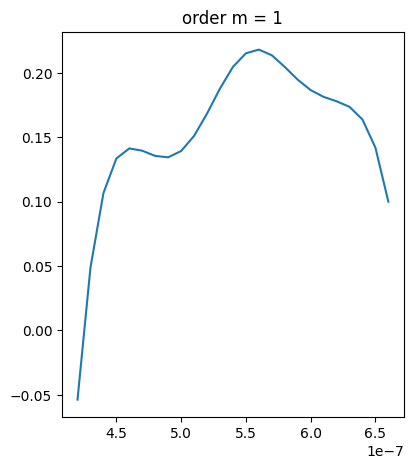

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(131), plt.plot(new_wvls, order1), plt.title('order m = 1')
# plt.subplot(132),plt.plot(g), plt.title('green')
# plt.subplot(133),plt.plot(b), plt.title('blue')

In [104]:
order1

array([-0.05369972,  0.04875561,  0.10653906,  0.13349999,  0.14132513,
        0.13953814,  0.1355    ,  0.13440883,  0.1393    ,  0.15104605,
        0.16835671,  0.18778983,  0.20458354,  0.215175  ,  0.21803205,
        0.21366453,  0.20461409,  0.19468607,  0.18662497,  0.18134631,
        0.17792658,  0.17360324,  0.1637746 ,  0.142     ,  0.09999969])

In [105]:
import numpy as np

In [106]:
intensity_dg = np.zeros(shape=(3,25))

In [107]:
intensity_dg[1] = 1. 

In [108]:
intensity_dg[0] = order1
intensity_dg[2] = order1

In [109]:
np.save('./intensity_dg.npy', intensity_dg)